In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fortnightly_incomes = pd.read_csv('fortnightly_income.csv')

In [7]:
fortnightly_incomes

,fortnight,2018,2019
0,1,409,442
1,2,401,437
2,3,385,412
3,4,335,486
4,5,394,464
5,6,343,483
6,7,320,473
7,8,390,578
8,9,344,442
9,10,368,432


Let's assume for the sake of this example that an individual needs to earn less than $400/fortnight to get welfare payments. We can plot the fortnightly income over two years and see how often our character was above and below this amount

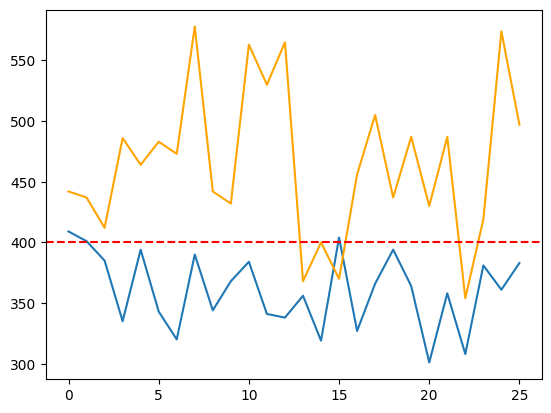

In [8]:
# Plot incomes over two years from the above dataframes. plot both 2018 and 2019
# on the same plot. Use the following code to make the plot.
plt.plot(fortnightly_incomes['2018'])
plt.plot(fortnightly_incomes['2019'], color='orange')
#add a line to show a point for 400
plt.axhline(y=400, color='r', linestyle='--')

With this threshold set, we can determine payouts being determined by the model

In [9]:
income_2018 = fortnightly_incomes['2018']
payout_2018 = [400 - x if x < 400 else 0 for x in income_2018]
income_2019 = fortnightly_incomes['2019']
payout_2019 = [400 - x if x < 400 else 0 for x in income_2019]
fortnightly_incomes['payout_2018'] = payout_2018
fortnightly_incomes['payout_2019'] = payout_2019
total_payout_2018 = sum(payout_2018)
total_payout_2019 = sum(payout_2019)
print('Total payout in 2018: ${}'.format(total_payout_2018))
print('Total payout in 2019: ${}'.format(total_payout_2019))

Total payout in 2018: $1040
Total payout in 2019: $108


In [10]:
average_income_2018 = fortnightly_incomes['2018'].mean()
average_income_2019 = fortnightly_incomes['2019'].mean()

if average_income_2018 < 400:
    expected_payout_2018 = 400 - average_income_2018
else:
    expected_payout_2018 = 0

if average_income_2019 < 400:
    expected_payout_2019 = 400 - average_income_2019
else:
    expected_payout_2019 = 0

print('Average income in 2018: {average_income_2018:.2f}, so expected payout per fortnight is ${expected_payout_2018:.2f}'.format(average_income_2018=average_income_2018, expected_payout_2018=expected_payout_2018))
print('Average income in 2019: {average_income_2019:.2f}, so expected payout per fortnight is ${expected_payout_2019:.2f}'.format(average_income_2019=average_income_2019, expected_payout_2019=expected_payout_2019))

Average income in 2018: 360.54, so expected payout per fortnight is $39.46
Average income in 2019: 465.04, so expected payout per fortnight is $0.00


We can now chart out what the centerlink was paying on a fortnightly basis against what the Robodebt AI expects to payout at the end of the year with the annual average income

Text(0.5, 1.0, 'Payouts for 2018')

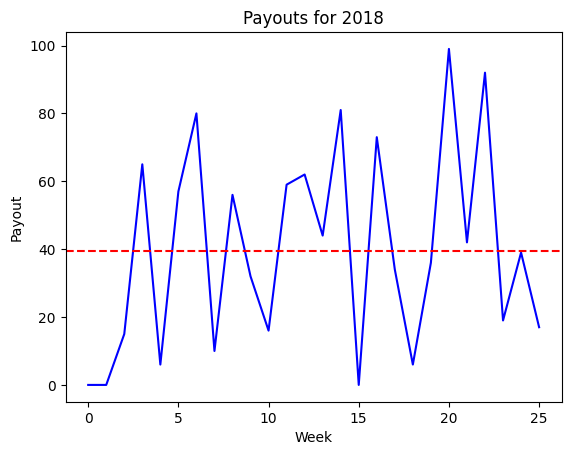

In [11]:
# In 2018:
plt.plot(payout_2018, color = 'blue', label = 'Expected')
plt.axhline(expected_payout_2018, color = 'red', linestyle = '--', label = 'Actual')
plt.xlabel('Week')
plt.ylabel('Payout')
plt.title('Payouts for 2018')


Text(0.5, 1.0, 'Payouts for 2019')

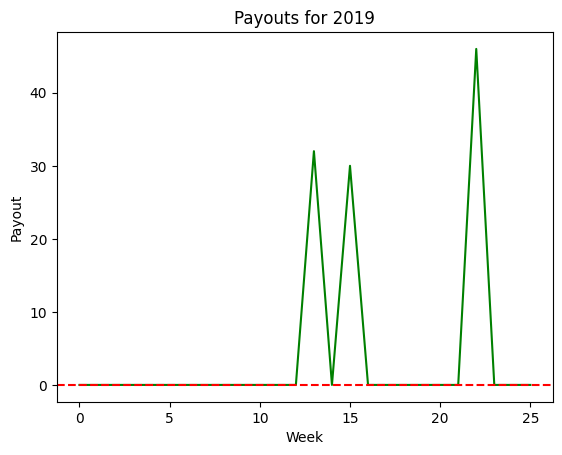

In [12]:
plt.plot(payout_2019, color = 'green', label = 'Expected')
plt.axhline(expected_payout_2019, color = 'red', linestyle = '--', label = 'Actual')
plt.xlabel('Week')
plt.ylabel('Payout')
plt.title('Payouts for 2019')

In [13]:
cumulative_actual_payout_2018 = sum(fortnightly_incomes['payout_2018'])
cumulative_actual_payout_2019 = sum(fortnightly_incomes['payout_2019'])
print(f"Total actual payout in 2018: {cumulative_actual_payout_2018}, but according to robodebts averageing of ATO data: {expected_payout_2018*26}")
print(f"Total actual payout in 2019: {cumulative_actual_payout_2019}, but according to robodebt averaging of ATO data: {expected_payout_2019*26}")

Total actual payout in 2018: 1040, but according to robodebts averageing of ATO data: 1025.9999999999998
Total actual payout in 2019: 108, but according to robodebt averaging of ATO data: 0


In 2019, since the average income from ATO data was more than the threshold for welfare payments, robodebt determines that the person should not have been eligible for welfare payments and hence is issued a debt notice. This contradiction illustrates jensens inequality